In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point
import geoplot.crs as gcrs
import contextily as cx
import plotly.express as px
from geopandas.tools import overlay

In [59]:
# Kept the original dataset
listingsNYC = pd.read_csv('listings.csv', dtype=object)

# Dropping all of the columns which we will not use
listingsNYC= listingsNYC.drop(['last_review','license','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
listingsNYC.dropna(axis=0, how='any', inplace=True)
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64',
    'latitude':float,
    'longitude':float,
    
}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)

# creating a price per stay (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['pps'] = (listingsNYC['price'] * listingsNYC['minimum_nights']).round(2)
listingsNYC = listingsNYC[(listingsNYC['price'] != 0)]
listingsNYC.loc[:,'log_price']=np.log(listingsNYC['price'])
listingsNYC

id                                          name  \
0                    5136      Spacious Brooklyn Duplex, Patio + Garden   
1                    5203            Cozy Clean Guest Room - Family Apt   
2                    5121                               BlissArtsSpace!   
3                    5178              Large Furnished Room Near B'way　   
4                    2595                         Skylit Midtown Castle   
...                   ...                                           ...   
41139  769580756557673403       Cozy 1 bedroom with 2 full beds ROOM #2   
41160  769612968972941927                 Comfortable 1 bedroom ROOM #3   
41175  770593748958588679  Luxury Brooklyn apt. | 10 mins away from JFK   
41218  769850569510129629                 Private Bed Manhattan 20 Mins   
41431  773290288588713925              Modern Luxury- Chelsea Townhouse   

         host_id neighbourhood_group       neighbourhood   latitude  \
0           7378            Brooklyn         Sunset Park  40.662650   
1           7490           Manhattan     Upper West Side  40.803800   
2           7356            Brooklyn  Bedford-Stuyvesant  40.685350   
3           8967           Manhattan             Midtown  40.764570   
4           2845           Manhattan             Midtown  40.753560   
...          ...                 ...                 ...        ...   
41139  162927656              Queens             Jamaica  40.693422   
41160  162927656              Queens             Jamaica  40.691520   
41175  489532090            Brooklyn       East New York  40.666019   
41218  324722741              Queens            Woodside  40.746040   
41431  371921352           Manhattan             Chelsea  40.745010   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0     -73.994540  Entire home/apt    275              21                  3   
1     -73.967510     Private room     75               2                118   
2     -73.955120     Private room     60              30                 50   
3     -73.983170     Private room     68               2                559   
4     -73.985590  Entire home/apt    175              30                 49   
...          ...              ...    ...             ...                ...   
41139 -73.804985      Shared room     99               1                  1   
41160 -73.805300      Shared room     91               1                  1   
41175 -73.857968  Entire home/apt    145               1                  2   
41218 -73.909110     Private room     50               1                  1   
41431 -74.007082  Entire home/apt   2000               3                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.03                               1               267   
1                   0.73                               1                 0   
2                   0.30                               2               322   
3                   3.38                               1                79   
4                   0.31                               3               365   
...                  ...                             ...               ...   
41139               1.00                               7               174   
41160               1.00                               7               174   
41175               2.00                               1               351   
41218               1.00                               1               240   
41431               1.00                               1               338   

       number_of_reviews_ltm   pps  log_price  
0                          1  5775   5.616771  
1                          0   150   4.317488  
2                          0  1800   4.094345  
3                         50   136   4.219508  
4                          1  5250   5.164786  
...                      ...   ...        ...  
41139                      1    99   4.595120  

In [60]:
nyc_map = gpd.read_file("neighbourhoods.geojson")
nyc_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
nyc_map

neighbourhood neighbourhood_group  \
0             Bayswater              Queens   
1              Allerton               Bronx   
2           City Island               Bronx   
3      Ditmars Steinway              Queens   
4            Ozone Park              Queens   
..                  ...                 ...   
228  Westchester Square               Bronx   
229         Westerleigh       Staten Island   
230      Williamsbridge               Bronx   
231        Williamsburg            Brooklyn   
232         Willowbrook       Staten Island   

                                              geometry  
0    MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...  
1    MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...  
2    MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...  
3    MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...  
4    MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...  
..                                                 ...  
228  MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ...  
229  MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ...  
230  MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ...  
231  MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ...  
232  MULTIPOLYGON (((-74.14707 40.60550, -74.14203 ...  

[233 rows x 3 columns]

In [62]:
nyc_map.to_crs(epsg=3857, inplace=True)

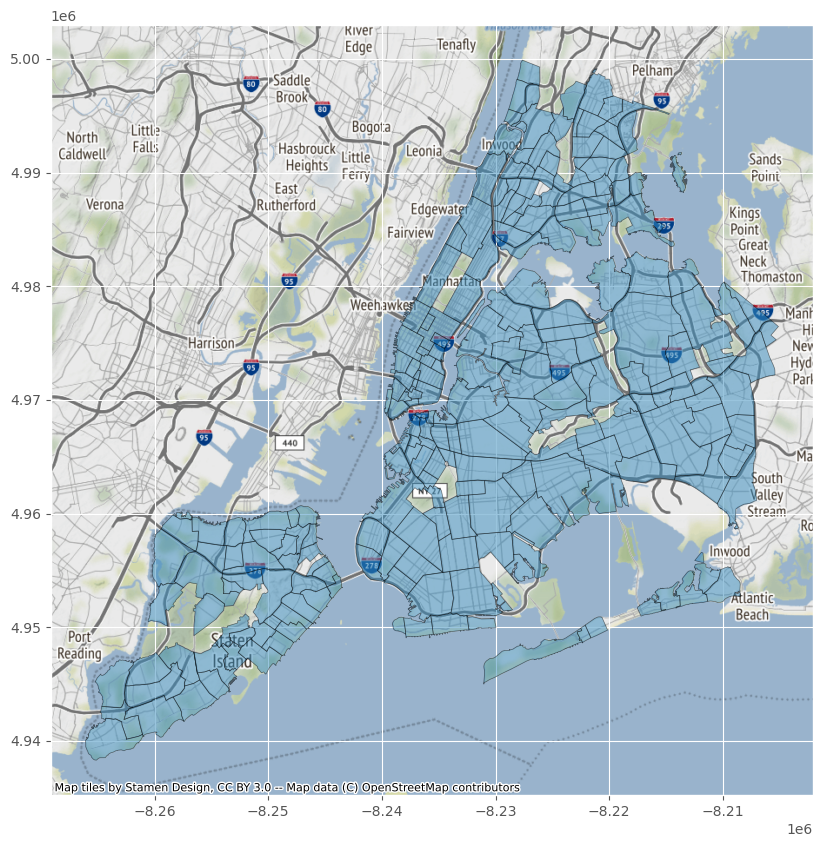

In [63]:
ax=nyc_map.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
nyc_basemap = cx.add_basemap(ax)

In [69]:
neighborhood_counts = listingsNYC.groupby('neighbourhood').count()
neighborhood_counts=neighborhood_counts[['id']]
neighborhood_counts.rename(columns={'id':'neighborhood_count'}, inplace=True)
neighborhood_means = listingsNYC.groupby('neighbourhood').mean()
neighborhood_means=neighborhood_means[['latitude','longitude','price']]
neighborhood_means_and_counts= pd.merge(neighborhood_counts,neighborhood_means, on='neighbourhood')


top_20_count=neighborhood_means_and_counts.sort_values(by='neighborhood_count',ascending=False).head(20)

top_20_price = neighborhood_means_and_counts.sort_values(by='price',ascending=False).head(20)
top_20_count
top_20_price

neighborhood_count   latitude  longitude        price
neighbourhood                                                            
Coney Island                        18  40.577128 -73.994464  4277.833333
West Brighton                       23  40.631975 -74.113903  3263.521739
Tribeca                            100  40.717744 -74.007508   531.580000
Hollis Hills                         1  40.731190 -73.754120   484.000000
Theater District                   184  40.759631 -73.985296   473.592391
Flatiron District                   85  40.741899 -73.988540   419.223529
SoHo                               195  40.724239 -74.002360   416.661538
Midtown                           1188  40.753467 -73.978756   386.317340
Financial District                 375  40.706557 -74.008102   375.013333
Downtown Brooklyn                   43  40.694518 -73.985113   335.441860
Chelsea                            663  40.745177 -73.997559   329.369532
Willowbrook                          1  40.599190 -74.133890   329.000000
West Village                       387  40.734236 -74.004102   320.870801
Greenwich Village                  156  40.730991 -73.998206   305.602564
Navy Yard                            6  40.699809 -73.975407   296.333333
Neponsit                             2  40.570080 -73.860335   293.500000
Murray Hill                        245  40.748261 -73.976792   285.477551
Hell's Kitchen                    1103  40.761411 -73.992245   285.331822
DUMBO                               20  40.703127 -73.987003   279.400000
Longwood                            59  40.819178 -73.902995   274.152542

In [52]:
nyc_top20_count_map= nyc_map.merge(top_20_count, on='neighbourhood', how='inner')
nyc_top20_count_map=nyc_top20_count_map[nyc_top20_count_map['price']<3000]
nyc_top20_count_map.to_crs(epsg=3857, inplace=True)

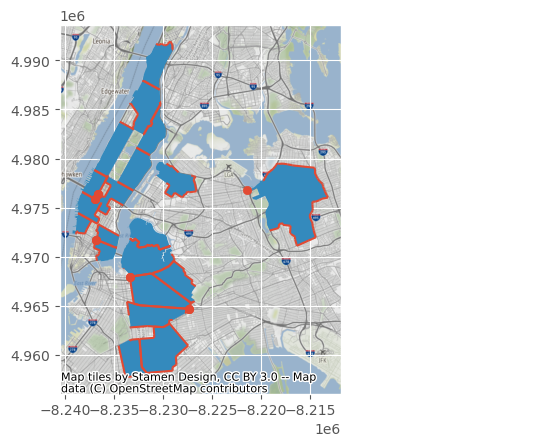

In [53]:
overlay_df = nyc_map.overlay(nyc_top20_count_map, how="intersection",keep_geom_type=False)
ax = overlay_df.plot()
cx.add_basemap(ax)

Text(0.5, 1.0, 'Top 20 Neighborhoods with the most Listings')

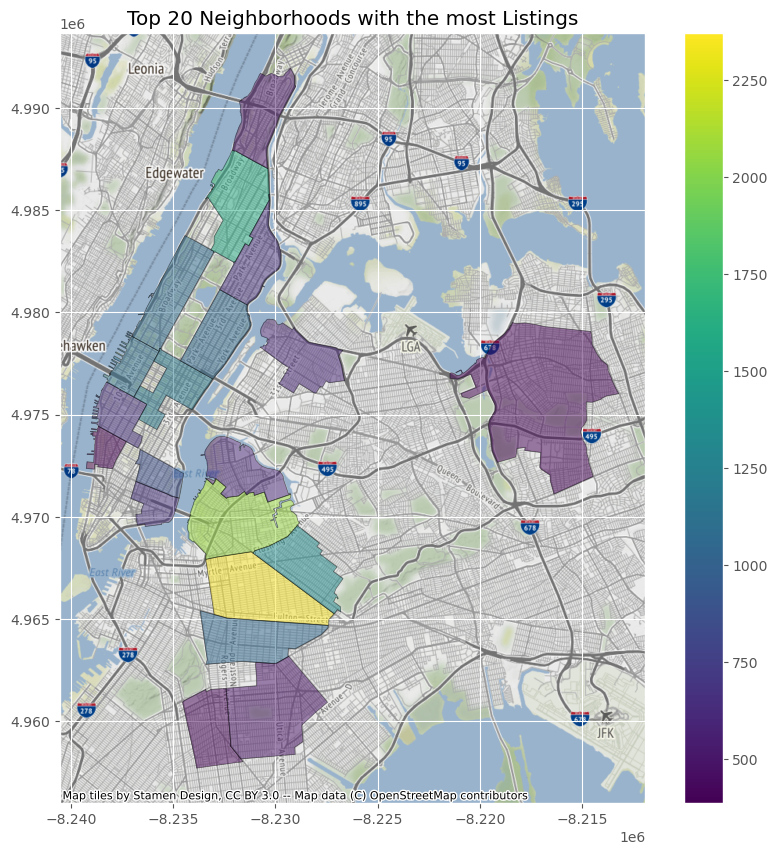

In [72]:
ax=nyc_top20_count_map.plot('neighborhood_count',figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True)
cx.add_basemap(ax)
plt.title('Top 20 Neighborhoods with the most Listings')

Text(0.5, 1.0, 'Average Price of the Neighborhoods with the Most Listings')

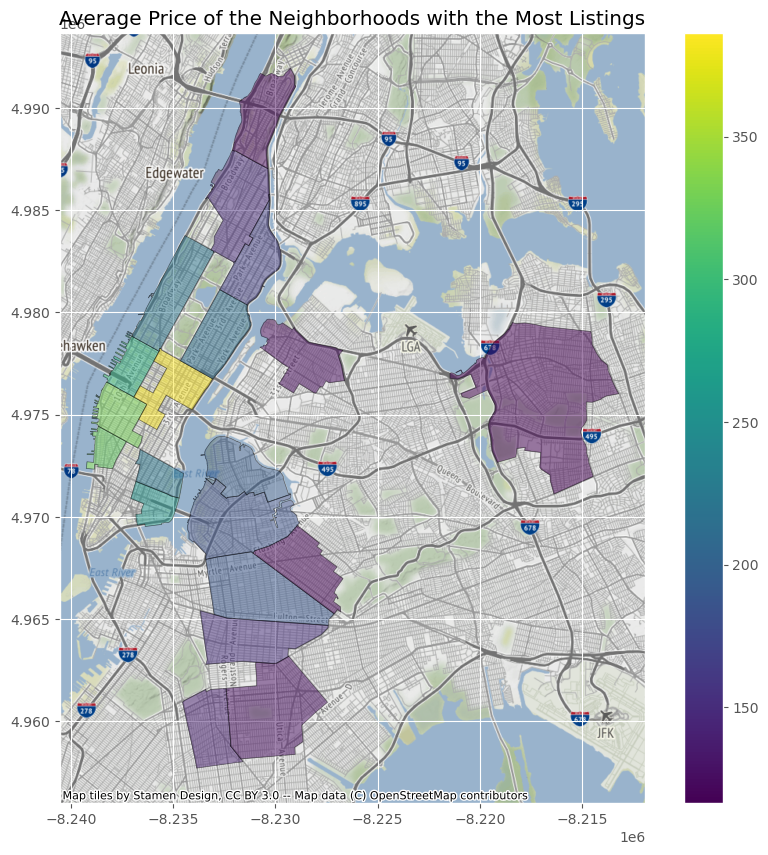

In [73]:
ax=nyc_top20_count_map.plot('price',figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True)
cx.add_basemap(ax)
plt.title('Average Price of the Neighborhoods with the Most Listings')

In [83]:
nyc_map_all= nyc_map.merge(neighborhood_means_and_counts, on='neighbourhood', how='inner')
nyc_map_all=nyc_map_all[nyc_map_all['price']<3000]
nyc_map_all.to_crs(epsg=3857, inplace=True)
nyc_map_all

neighbourhood neighbourhood_group  \
0             Bayswater              Queens   
1             Bayswater              Queens   
2              Allerton               Bronx   
3           City Island               Bronx   
4           City Island               Bronx   
..                  ...                 ...   
219  Westchester Square               Bronx   
220         Westerleigh       Staten Island   
221      Williamsbridge               Bronx   
222        Williamsburg            Brooklyn   
223         Willowbrook       Staten Island   

                                              geometry  neighborhood_count  \
0    MULTIPOLYGON (((-8211672.372 4955705.986, -821...                  21   
1    MULTIPOLYGON (((-8211489.474 4955509.042, -821...                  21   
2    MULTIPOLYGON (((-8220788.214 4993431.406, -822...                  45   
3    MULTIPOLYGON (((-8213466.174 4989346.939, -821...                  13   
4    MULTIPOLYGON (((-8213660.983 4991671.627, -821...                  13   
..                                                 ...                 ...   
219  MULTIPOLYGON (((-8220158.591 4989712.618, -821...                   7   
220  MULTIPOLYGON (((-8252259.681 4957380.390, -825...                   1   
221  MULTIPOLYGON (((-8222860.871 4993139.927, -822...                  64   
222  MULTIPOLYGON (((-8232919.255 4971877.704, -823...                2067   
223  MULTIPOLYGON (((-8254013.631 4954326.581, -825...                   1   

      latitude  longitude       price  
0    40.606350 -73.762886  100.904762  
1    40.606350 -73.762886  100.904762  
2    40.864974 -73.858897  112.244444  
3    40.849265 -73.787852  125.923077  
4    40.849265 -73.787852  125.923077  
..         ...        ...         ...  
219  40.842390 -73.847094   90.285714  
220  40.617850 -74.135200   91.000000  
221  40.878367 -73.856421  118.656250  
222  40.712410 -73.951810  184.217223  
223  40.599190 -74.133890  329.000000  

[222 rows x 7 columns]

Text(0.5, 1.0, 'Number of listings by Neighborhood')

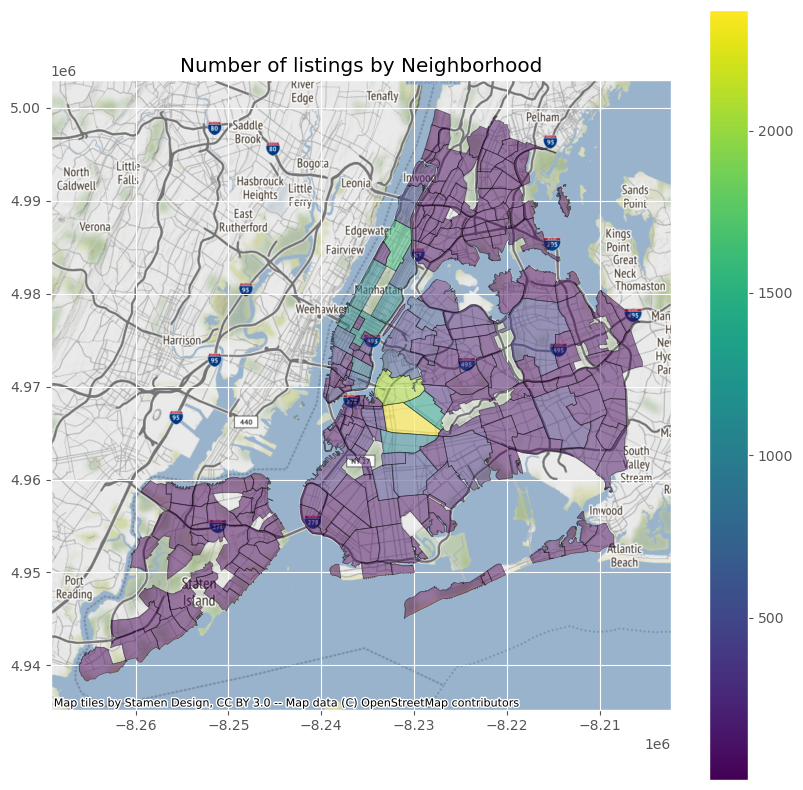

In [86]:
ax=nyc_map_all.plot('neighborhood_count',figsize=(10, 10), alpha=0.5, edgecolor='k', legend=True)
cx.add_basemap(ax)
plt.title('Number of listings by Neighborhood')